In [2]:
import numpy as np
import gillespy2
from gillespy2 import Model, Species, Parameter, Reaction, Event, \
                      EventTrigger, EventAssignment, RateRule, \
                      AssignmentRule, FunctionDefinition
from gillespy2 import SSACSolver
import matplotlib.pyplot as plt

In [3]:
class Chapter2(Model):
    def __init__(self, parameter_values=None):
        Model.__init__(self, name="chapter2")
        self.volume = 1

        # Parameters
        self.add_parameter(Parameter(name="birth_A", expression="1"))
        self.add_parameter(Parameter(name="birth_B", expression="0.1"))
        self.add_parameter(Parameter(name="death_B", expression="0.05"))

        # Variables
        self.add_species(Species(name="A", initial_value=100, mode="discrete"))
        self.add_species(Species(name="B", initial_value=0, mode="discrete"))

        # Reactions
        self.add_reaction(Reaction(name="birthA", reactants={}, products={'A': 1}, rate=self.listOfParameters["birth_A"]))
        self.add_reaction(Reaction(name="birthB", reactants={'B': 1}, products={}, rate=self.listOfParameters["death_B"]))
        self.add_reaction(Reaction(name="birthC", reactants={'A': 1}, products={'B': 1}, rate=self.listOfParameters["birth_B"]))

        # Timespan
        self.timespan(np.arange(0, 100, 1))

In [5]:
model = Chapter2()
res = model.run(solver=SSACSolver, seed=3)

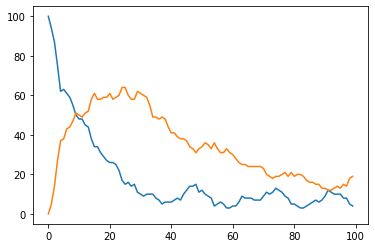

In [6]:
plt.plot(res['A'])
plt.plot(res['B'])

In [7]:
prey = res['A']
predator = res['B']

res = np.vstack([prey, predator])[np.newaxis,:,:]

In [9]:
np.save('target_ts', res)